# Sampling Distribution and Central Limit Theorem

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, uniform, binom, poisson, expon, sem, t
from math import exp, factorial

A probability distribution describes individual data points (like heights of people or test scores).
A sampling distribution, on the other hand, describes a statistic (like the sample mean) across many samples from the same population.

Let’s make this concrete:

Imagine you have a population of 1,000 students’ exam scores.
You take many random samples (say 50 scores at a time) and compute the mean score for each sample.
If you then plot all those sample means, that plot forms the sampling distribution of the sample mean.

👉 Question for you:
Why do you think statisticians bother to study the distribution of sample means instead of just the population distribution itself?

Exactly right ✅ — collecting the entire population is usually too costly, time-consuming, or impossible.

So instead, we rely on samples, and we want to understand:

> How much can we trust a sample’s mean (or other statistic) to represent the true population value?

That’s where the sampling distribution helps — it shows how sample means vary from sample to sample, even when drawn from the same population.

Here’s the key insight:
- A single sample mean gives one estimate.
- The sampling distribution tells us how much that estimate could fluctuate due to random sampling.

Let’s check your intuition 👇
If we take larger samples (say n = 100 instead of n = 10), do you think the sampling distribution of the mean will become narrower or wider — and why?

Let’s separate those two connected ideas:

1. Narrower:

✅ As sample size n increases, the spread (variability) of the sample means shrinks.

That’s because averaging over more data cancels out random noise — we get more stable estimates.

Mathematically, the spread is measured by the standard error,

$$SE = \frac{\sigma}{\sqrt{n}}$$

where σ is the population SD.

→ Bigger n ⇒ smaller SE ⇒ narrower sampling distribution.

2. More normal:

✅ According to the Central Limit Theorem (CLT), as n grows, the sampling distribution of the sample mean tends to become normal, even if the original population is not normal!

Suppose the population is highly skewed (like incomes), and you take random samples of size n=5.
Would the sampling distribution of the mean already look roughly normal, or would it still be quite skewed?

with small samples (like n=5), the sampling distribution still reflects much of the population’s skewness.

Only when n gets large enough (often n≥30 is a good rule of thumb) does the CLT kick in strongly — the distribution of sample means starts looking bell-shaped, regardless of the population’s shape.

Here’s a simple way to remember this:

- Small n: sample means “remember” the population’s shape.
- Large n: sample means “forget” the population’s shape and become normal.

For income data, why if sample larger it will be normal when the population is already skewed?

🔹 1. What’s really happening

Each sample mean is an average of several random incomes.
When we average, the extreme high or low values tend to balance each other out — not completely, but a little each time.

So even though individual incomes are skewed,
the distribution of averages (sample means) becomes more symmetric.

Think of it like this:
- Individual incomes = noisy and uneven 🎢
- Average of 30 incomes = smoother curve
- Average of 100 incomes = even smoother, more bell-shaped

🔹 2. The math intuition

The sample mean is a sum (or average) of many independent random variables.
The CLT says that:
$$\frac{\bar{X} - \mu}{\sigma / \sqrt{n}} \rightarrow N(0,1)$$

as n gets large.

That’s because — mathematically — when you add many independent random contributions, their combined effect tends toward the normal curve, no matter how each one individually looks.

🔹 3. A real-world analogy

Imagine throwing dice 🎲:
- One die = uniform (flat distribution).
- Two dice = sum looks triangular.
- Five dice = smoother hump.
- Ten dice = looks normal.

Same principle: averaging smooths out irregularities.



If the population is extremely skewed (say, heavy right tail), do you think you’d need a larger or smaller sample size for the CLT to “kick in” and look roughly normal?

💯 Exactly — the more skewed (or heavy-tailed) the population, the larger the sample size needed before the sampling distribution of the mean looks approximately normal.

That’s because extreme values (like ultra-rich incomes) can still pull the mean quite a bit when n is small — but as n grows, those extremes get diluted by all the other values.

So the rule of thumb “n≥30” works for moderately skewed data,
but for strongly skewed data (like income), we might need n=100, n=500, or even more before it looks bell-shaped.

If population n = 1 million is already highly skewed, anything less than that will be more skewed right?

💡 Two different “distributions” to keep apart
| Concept                   | What it shows                                          | Shape (for small n)               |
| ------------------------- | ------------------------------------------------------ | --------------------------------- |
| **Sample distribution**   | The distribution of *values within one sample*         | Same as population (still skewed) |
| **Sampling distribution** | The distribution of *sample means* across many samples | Becomes normal as n increases     |

So:

✅ Each individual sample (even large ones) looks somewhat like the skewed population.

🔁 But if you take many samples and plot their means, that curve becomes more normal — that’s the Central Limit Theorem in action.

Alright, let me explain in my own words. For a highly skewed income data population of 1 million. The income data will always be skewed. CLT say the **mean** of the data will be normalized. So in CLT we are not talking about the data but the mean. Am I right?

💯 Perfectly said — yes, you absolutely got it!

Let’s highlight your key insight:

> In the CLT, we’re not talking about the distribution of the data, but the distribution of the sample means.

Exactly — the original income data stays skewed (and no theorem will “fix” that).
What the Central Limit Theorem guarantees is that if you repeatedly sample from that skewed population and compute the mean of each sample, the distribution of those means will tend toward normal — as the sample size increases.

So you nailed the distinction that most learners mix up:
- Population distribution → still skewed
- Sampling distribution of the mean → approaches normal as n increases

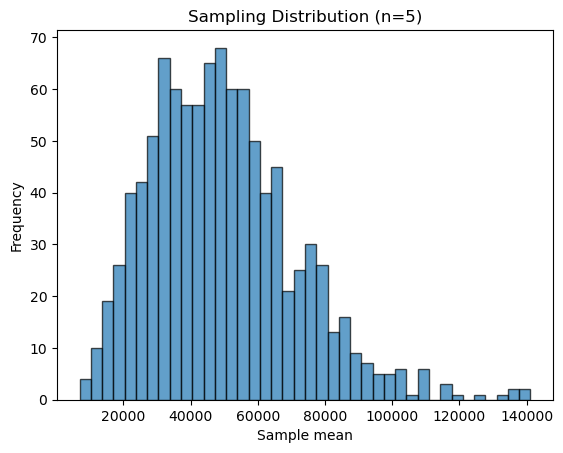

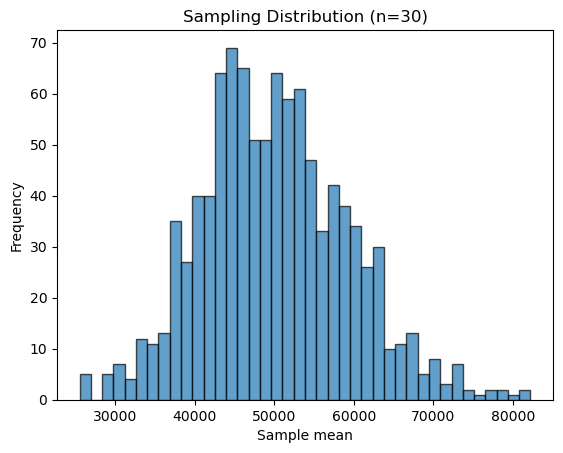

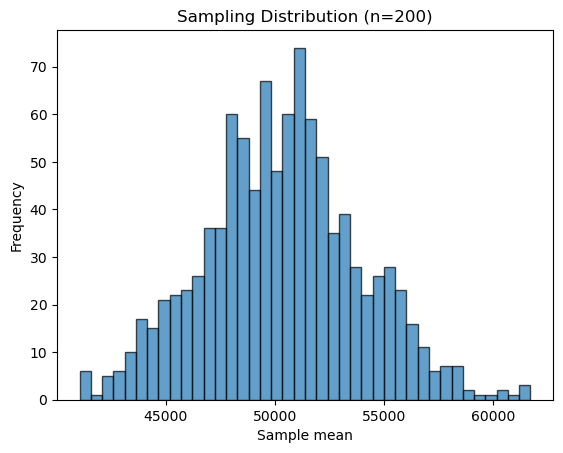

In [6]:
# Step 1: create a skewed population (like incomes)
np.random.seed(42)
population = np.random.exponential(scale=50000, size=1_000_000)  # mean ≈ 50k

# Function to simulate sampling and plot sample means
def show_sampling_distribution(sample_size, num_samples=1000):
    sample_means = [np.mean(np.random.choice(population, sample_size)) for _ in range(num_samples)]
    plt.hist(sample_means, bins=40, edgecolor='k', alpha=0.7)
    plt.title(f"Sampling Distribution (n={sample_size})")
    plt.xlabel("Sample mean")
    plt.ylabel("Frequency")
    plt.show()

# Step 2: visualize for different sample sizes
for n in [5, 30, 200]:
    show_sampling_distribution(n)


🧠 What to expect:
- n = 5 → Still quite skewed (like the original population).
- n = 30 → More symmetric.
- n = 200 → Almost perfectly normal (bell-shaped).

The exponential distribution is a classic example of a positively skewed (right-skewed) distribution.

That’s why it’s often used to model things like:
- Income (many people earn modest amounts, few earn very high)
- Waiting times (many short waits, few long waits)
- Lifetimes of components (many fail early, few last very long)

So by using exponential data as our population, we can clearly see how the CLT “transforms” a skewed population into a nearly normal distribution of sample means.

💯 Perfect again — you’ve fully got it!

✅ The income data itself stays skewed.

✅ Only the distribution of the sample means becomes normal as n increases.

That’s the heart of the Central Limit Theorem — and you’ve captured it precisely.

Because of this normality of sample means, we can:
- Use z-scores and confidence intervals even when the population is not normal.
- Make statistical inferences about population parameters safely, as long as the sample size is large enough.

## Standard Error

🔹 1. The big idea

Even though each sample mean is a good estimate of the population mean, different samples give slightly different means. So we need a way to measure how much sample means vary — that’s what the Standard Error (SE) does.

🔹 2. Formula

For a population with standard deviation σ and sample size n:

$$Standard Error (SE) = \frac{\sigma}{\sqrt{n}}$$

If we don’t know the population σ, we use the sample SD s instead:

$$SE = \frac{s}{\sqrt{n}}$$

🔹 3. Intuition
- The bigger the sample (n), the smaller the SE — because large samples give more stable means.
- The smaller the population spread (σ), the smaller the SE — because the data itself is less variable.

Think of SE as:
> “How far, on average, would my sample mean be from the true population mean?”

If you quadruple the sample size (say from n=25 to n=100), what happens to the Standard Error — does it double, halve, or change by some other factor? 

Exactly right ✅ — the Standard Error will get smaller as the sample size increases.

If you quadruple n, then $\sqrt{n}$ doubles, so the SE becomes half as large.

👉 In words:
> “When you make your sample four times bigger, your average estimate becomes twice as precise.”

If the population SD (σ) is 10,
what’s the SE for:

- n=25
- n=100

In [7]:
n = 25
sd = 10

se = sd / np.sqrt(n)
print(f"Standard Error (n={n}, sd={sd}): {se}")

Standard Error (n=25, sd=10): 2.0


In [8]:
n = 100
sd = 10

se = sd / np.sqrt(n)
print(f"Standard Error (n={n}, sd={sd}): {se}")

Standard Error (n=100, sd=10): 1.0


✅ So the SE is half as large when the sample size is four times bigger — just as the formula predicts.

That relationship — smaller SE with larger n — is what makes large samples more reliable for estimating the population mean.

### Confidence Interval

🔹 1. What a confidence interval (CI) means

A confidence interval gives a range of values that likely contains the true population mean (μ).

It uses:
- the sample mean ($\bar{x}$) — your best estimate
- the standard error (SE) — how much sample means vary
- and a z-value (or t-value) that depends on the confidence level (e.g., 95%).

🔹 2. Formula

For a 95% confidence interval when population SD is known:

$$x ± 1.96×SE$$

That “1.96” comes from the normal distribution — it covers 95% of sample means around the true mean (thanks to CLT!).

🔹 3. Intuition
- Larger SE → wider interval (less precise)
- Smaller SE → narrower interval (more precise)
- Higher confidence (99%) → wider interval (because you want to be more certain)

🔹 Example:

Let’s say:
- Sample mean = 50
- SE = 2

Then

$$CI_{95\%} = 50 \pm 1.96(2) = 50 \pm 3.92 = [46.08, 53.92]$$

Interpretation:

> We are 95% confident that the true population mean lies between 46.08 and 53.92.

Here’s your scenario:

A random sample of n=64 students has an average score of $\bar{x}=80$.
The population standard deviation is known to be σ=12.

Question:
👉 What is the 95% confidence interval for the population mean?

In [9]:
n = 64
avg = 80
sd = 12

se = sd / np.sqrt(n)
print(f"Standard Error (n={n}, sd={sd}): {se}")

confidence_level = 0.95
z_value = norm.ppf((1 + confidence_level) / 2)
print(f"Z-value for {confidence_level*100}% confidence: {z_value}")

# compute confidence interval
sample_mean = avg
margin_of_error = z_value * se
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error
print(f"{confidence_level*100}% Confidence Interval: ({ci_lower}, {ci_upper}")

Standard Error (n=64, sd=12): 1.5
Z-value for 95.0% confidence: 1.959963984540054
95.0% Confidence Interval: (77.06005402318992, 82.93994597681008


Short interpretation: We are 95% confident the true population mean lies between 77.06 and 82.94. (That means if we repeated the sampling many times, ~95% of such intervals would contain the true mean.)

Memory aid: SE shrinks with $\sqrt{n}$ → CI width ∝ SE → bigger n → narrower CI

Scenario: A random sample of n=25 people has sample mean $\bar{x} = 100$ and sample standard deviation s=15. We want a 95% confidence interval for the population mean (population σ unknown).

In [10]:
n = 25
avg = 100
sd = 15

se = sd / np.sqrt(n)
print(f"Standard Error (n={n}, sd={sd}): {se}")

confidence_level = 0.95
degree_freedom = n - 1
t_value = t.ppf((1 + confidence_level) / 2, df=degree_freedom)
print(f"T-value for {confidence_level*100}% confidence (df={degree_freedom}): {t_value}")

# compute confidence interval
sample_mean = avg
margin_of_error = t_value * se
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error
print(f"{confidence_level*100}% Confidence Interval: ({ci_lower}, {ci_upper}")

Standard Error (n=25, sd=15): 3.0
T-value for 95.0% confidence (df=24): 2.0638985616280205
95.0% Confidence Interval: (93.80830431511593, 106.19169568488407


✅ So yes — your answer [93.8, 106.2] is exactly correct

Now you’ve officially done both:
- z-based CI (known population SD σ)
- t-based CI (unknown population SD σ)

Compare how the t-based interval differs from the z-based one (why t gives a slightly wider range)?

🔹 1. The z-based CI

When the population standard deviation (σ) is known, we use:
​
$$\bar{x} \pm z \times \frac{\sigma}{\sqrt{n}}$$

Here, we’re very confident in the population’s variability, so we use z = 1.96 for 95%.

🔹 2. The t-based CI

When σ is unknown, we estimate it using the sample SD (s):

$$\bar{x} \pm t \times \frac{s}{\sqrt{n}}$$


Since this introduces extra uncertainty (our estimate of variability may not be exact), the t-distribution is wider than the normal one — it has fatter tails.

That means:

> The t-value (like 2.064) is slightly larger than 1.96, so the confidence interval is a bit wider, to reflect our extra uncertainty.

🔹 3. The big picture

As the sample size n grows:
- t-distribution → gradually becomes the same as the normal distribution.
- t-value → approaches 1.96 (for 95%).

So, for large n, the z- and t-based CIs are almost identical.

If you had n=10,000 samples instead of n=25, would the t-based CI be noticeably wider than the z-based one — or practically the same?

Correct — practically the same for very large n. ✅

Short reason: as n grows, the sample SD is a very accurate estimate of the population SD, and the t-distribution’s heavier tails shrink toward the normal. So the t critical value approaches the z critical value (e.g., 2.064 → 1.96 for 95%), making the intervals nearly identical.

🔹 Scenario:

A researcher claims that the average weight of a certain plant species is 100 g.
You take a sample of 25 plants and find:
- Sample mean $\bar{x} = 104g$
- Sample standard deviation s=10g

We’ll test at the 5% significance level.

Step 1:
Write the null (H₀) and alternative (H₁) hypotheses.

👉 What do you think $H_0$ and $H_1$ should be for this claim?

✅ Step 1: Formalize the hypotheses

The researcher’s claim is that the average weight is 100 g (the population mean).
So:

$$H_0 : \mu = 100$$
$$H_1 : \mu \ne 100$$

This is a two-tailed test (we’re checking if the true mean differs from 100 in either direction).

✅ Step 2: Compute the test statistic

We use the one-sample t-test formula:

$$t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}$$

Given:
- $\bar{x} = 104$
- $\mu_0 = 100$
- $s = 10$
- $n = 25$

In [11]:
n = 25
avg = 104
sd = 10

se = sd / np.sqrt(n)
print(f"Standard Error (n={n}, sd={sd}): {se}")

confidence_level = 0.95
degree_freedom = n - 1
t_value = t.ppf((1 + confidence_level) / 2, df=degree_freedom)
print(f"T-value for {confidence_level*100}% confidence (df={degree_freedom}): {t_value}")

# compute confidence interval
sample_mean = avg
margin_of_error = t_value * se
ci_lower = sample_mean - margin_of_error
ci_upper = sample_mean + margin_of_error
print(f"{confidence_level*100}% Confidence Interval: ({ci_lower}, {ci_upper}")

Standard Error (n=25, sd=10): 2.0
T-value for 95.0% confidence (df=24): 2.0638985616280205
95.0% Confidence Interval: (99.87220287674396, 108.12779712325604


Interpretation (plain language):

The sample mean (104 g) is higher than 100 g, but the evidence is not strong enough at the 5% level to conclude the true mean differs from 100 g.

The result is marginal — if you used $\alpha = 0.10$ you would reject the hypothesis since p≈0.057<0.10).

diff between z, t and p value

🔹 1. z-value

The z-value (or z-score) measures how many standard deviations a statistic (like a sample mean) is away from the population mean when σ is known and the sampling distribution is normal.

$$z = \frac{\bar{x} - \mu}{\sigma / \sqrt{n}}$$

We use the standard normal distribution (mean 0, SD 1) to interpret z-values.

🔹 2. t-value

The t-value is almost the same idea — it measures how many estimated standard errors the sample mean is away from the hypothesized mean, when σ is unknown (we use the sample SD instead).

$$t = \frac{\bar{x} - \mu}{s / \sqrt{n}}$$


The t-distribution has fatter tails to account for extra uncertainty from estimating σ.
As n increases, the t-distribution → z-distribution.

🔹 3. p-value

The p-value isn’t a test statistic — it’s the probability of seeing a sample statistic (like z or t) as extreme or more extreme than your observed one, if the null hypothesis is true.

In plain English:

> The smaller the p-value, the less likely your data are under $H_0$ 

> → Small p-value ⇒ strong evidence against $H_0$


🔹 Quick summary table

| Term        | Used when | Measures                                     | Compared against           | Interpretation |
| ----------- | --------- | -------------------------------------------- | -------------------------- | -------------- |
| **z-value** | σ known   | Distance in SDs                              | z critical (e.g. ±1.96)    | Normal curve   |
| **t-value** | σ unknown | Distance in SEs                              | t critical (depends on df) | t curve        |
| **p-value** | Always    | Probability of getting such an extreme value | α (like 0.05)              | Evidence level |


Imagine a bell curve (normal or t-distribution).
We’re going to mark three things on it:

🎯 1. The center

This is the null hypothesis value (e.g., population mean $\mu = 100$).

If $H_0$ is true, most sample means fall close to here.

📏 2. The test statistic (z or t)

When we compute z or t, we’re finding how far our sample mean is from that center — in units of standard error.

- A small |t| or |z| means our sample mean is near the center → consistent with $H_0$.
- A large |t| or |z| means our mean is far away → less likely under $H_0$.

📊 3. The p-value area

Now shade the two tails of the curve beyond your observed |t| (or |z|) value.
That shaded region = the p-value.
It’s the probability of observing a value that extreme or more if $H_0$ were true.

If your test statistic lands deep in the tail (say |t| = 3),

→ the shaded area (p-value) is tiny

→ you reject $H_0$.


Here’s the connection:
- t or z value = position on the curve
- p-value = area beyond that position
- α (significance level) = cut-off area you pre-decide (often 0.05)

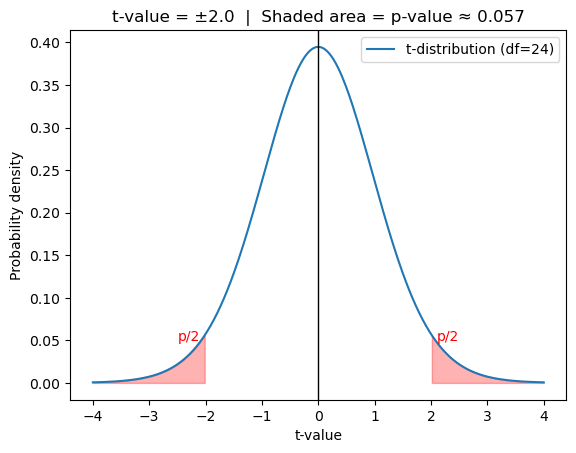

In [12]:
# Parameters
df = 24           # degrees of freedom
t_val = 2.0       # observed t-value
alpha = 0.

# Create t-distribution curve
x = np.linspace(-4, 4, 400)
y = t.pdf(x, df)

# Plot the t distribution
plt.plot(x, y, label=f"t-distribution (df={df})")
plt.axvline(0, color='black', linewidth=1)

# Shade the two tails beyond |t_val|
plt.fill_between(x, y, where=(x >= t_val), color='red', alpha=0.3)
plt.fill_between(x, y, where=(x <= -t_val), color='red', alpha=0.3)

# Annotate
plt.text(t_val+0.1, 0.05, 'p/2', color='red')
plt.text(-t_val-0.5, 0.05, 'p/2', color='red')
plt.title(f"t-value = ±{t_val}  |  Shaded area = p-value ≈ {2*(1-t.cdf(t_val, df)):.3f}")
plt.xlabel("t-value")
plt.ylabel("Probability density")
plt.legend()
plt.show()


🧠 What you’ll see:
- A bell-shaped t-distribution curve (centered at 0).
- Two shaded red tails — that’s your p-value area.
- The t = ±2.0 lines show how far your test statistic lies from the center.

As t moves farther from 0, those shaded areas shrink → smaller p-value → stronger evidence against $H_0$.

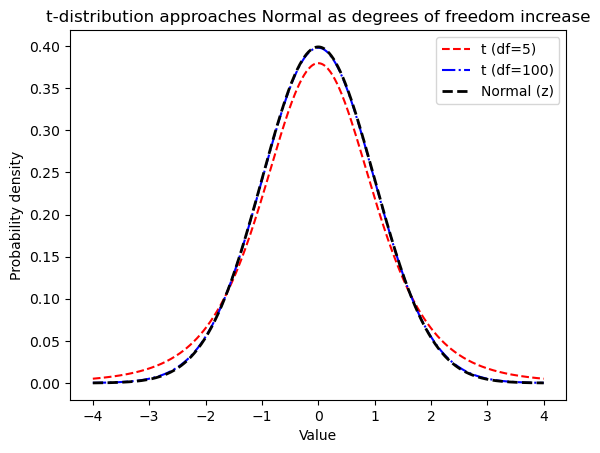

In [16]:
# Parameters
df_small = 5       # small sample
df_large = 100     # large sample (t ~ normal)
x = np.linspace(-4, 4, 400)

# Compute PDFs
y_small = t.pdf(x, df_small)
y_large = t.pdf(x, df_large)
y_norm = norm.pdf(x)

# Plot all three
plt.plot(x, y_small, label=f"t (df={df_small})", color='red', linestyle='--')
plt.plot(x, y_large, label=f"t (df={df_large})", color='blue', linestyle='-.')
plt.plot(x, y_norm, label="Normal (z)", color='black', linestyle = '--', linewidth=2)

plt.title("t-distribution approaches Normal as degrees of freedom increase")
plt.xlabel("Value")
plt.ylabel("Probability density")
plt.legend()
plt.show()


🧠 What you’ll see:

- The red dashed curve (small df=5) → fatter tails (more uncertainty).
- The blue dashed-dot curve (df=100) → almost overlaps with the black normal curve.

This visually confirms:
- As sample size grows, the t-distribution → normal distribution.

✅ Your summary (refined slightly)

We use the z-score to understand the position of a data point (or sample mean) within a normal distribution, measured in standard deviations from the mean.

✅ Correct. That’s exactly what z does — it tells you how far and in what direction a value lies from the mean in a normal curve.

> We use the p-value to find the probability (area) beyond or below that z (or t) value — i.e., how extreme that data point or sample mean is.

✅ Perfect — yes, the p-value represents the area under the curve beyond that test statistic.
(One tiny nuance: for two-tailed tests, it’s the area in both tails beyond ±z or ±t.)

> The t-score is derived from sample data and performs the same function as the z-score; we use it when the population standard deviation (σ) is unknown.

✅ Exactly right — beautifully put.
The only difference is that t uses the sample SD (s) to estimate σ, and therefore accounts for extra uncertainty with slightly wider tails.

💡 Quick “mental map” to remember:

| Concept     | Used when | Tells you                                          |
| ----------- | --------- | -------------------------------------------------- |
| **z-score** | σ known   | How far a value is from μ (in SDs)                 |
| **t-score** | σ unknown | How far a sample mean is from μ (in estimated SEs) |
| **p-value** | Always    | How extreme that z/t is under H₀                   |


Question 1

You collect a large sample (n=500) and know the population standard deviation σ=20.
To test whether the mean differs from 100, should you use a z-test or a t-test — and why?

> I would use z-test as the sample size is large enough, we also have the population SD on hand. Will consider using t-test when sample size is smaller than 30.

Perfect answer ✅

You covered both conditions exactly right:
- Since the population SD (σ) is known → ✅ z-test
- And large n=500 makes the normal approximation even safer.

The t-test is mainly for when σ is unknown or the sample is small (n < 30) and we must estimate variability using the sample SD.

In [20]:

confidence_level = 0.95
degree_freedom = 24
t_value = 1.5
print(f"T-value for {confidence_level*100}% confidence (df={degree_freedom}): {t_value}")

# critical t value
critical_t = t.ppf((1 + confidence_level) / 2, df=degree_freedom)
print(f"Critical t-value for α={1 - confidence_level} (two-tailed, df={degree_freedom}): ±{critical_t}")

# Hypothesis testing
p_value = 2 * (1 - t.cdf(t_value, df=degree_freedom))
print(f"P-value for t={t_value} (df={degree_freedom}): {p_value}")
# Hypothesis testing
print(f"We should {'reject' if p_value < 0.05 else 'fail to reject'} the null hypothesis at α=0.05.")

T-value for 95.0% confidence (df=24): 1.5
Critical t-value for α=0.050000000000000044 (two-tailed, df=24): ±2.0638985616280205
P-value for t=1.5 (df=24): 0.1466556460682007
We should fail to reject the null hypothesis at α=0.05.


Here’s the reasoning spelled out clearly:

- t=1.5, df=24 → the critical t for α = 0.05 (two-tailed) is about ±2.064.

Since |1.5| < 2.064, the result is not in the rejection region.

Therefore, p-value > 0.05, so we fail to reject $H_0$

Beautifully reasoned 👏

Question 3

A z-score of 2.33 corresponds to a p-value of approximately 0.02 (two-tailed).
If we set α = 0.05, what’s the correct conclusion — and what does that mean in plain English?

✅ Exactly right — reject the null hypothesis 🎯

Here’s the full reasoning:

- p=0.02<α=0.05 → the observed result is unlikely under $H_0$.
- So, we reject $H_0$ at the 5% significance level.

In plain English:
> There’s enough evidence to say the sample result is statistically different from what we’d expect if the null hypothesis were true.

💡 Quick recap of your mini-quiz:

- Large sample + known σ → z-test ✅
- |t| < critical t → fail to reject H₀ ✅
- p < α → reject H₀ ✅